In [1]:
# Library imports
import scipy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def rk4(t,dt,y,evaluate):
    k1 = dt * evaluate(t, y) 
    k2 = dt * evaluate(t + 0.5*dt, y + 0.5*k1)
    k3 = dt * evaluate(t + 0.5*dt, y + 0.5*k2)
    k4 = dt * evaluate(t + dt, y + k3)
    
    y_new = y + (1/6.)*(k1+ 2*k2 + 2*k3 + k4)
    
    return y_new

In [3]:
def run(T, dt, y0, masses, evaluate, t0 = 0):
    nsteps = int((T-t0)/dt)
    history = np.empty((nsteps+1, len(y0)))
    history[0, :] = y0
    
    t = t0
    for i in range(nsteps):
        history[i+1] = rk4(t, dt, history[i,:], evaluate) 
        t += dt
    
    return history

In [4]:
def showSimulation(history, projection):
    
    for method in history:
        nBodies = int(len(history[method][0])/6)
        if projection == '2d':
            fig = plt.figure()
            fig.suptitle('Prediction with ' + method + ' method', fontsize=16)
            ax = plt.axes()
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            for i in range(nBodies):
                ax.plot(history[method][:,i*6], history[method][:,i*6 + 1])
                
        elif projection == '3d':
            fig = plt.figure()
            fig.suptitle('Prediction with ' + method + ' method', fontsize=16)
            ax = plt.axes(projection='3d')
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z');
            for i in range(nBodies):
                ax.plot3D(history[method][:,i*6], history[method][:,i*6 + 1], history[method][:,i*6 + 2])
    
    
    return 

In [10]:
def evaluate(t, y):
    NBodies = int(len(y)/6)
    solved_vector = np.zeros(y.size)
    
    for i in range(NBodies):
        ioffset = i*6
        solved_vector[ioffset:ioffset+3] = y[ioffset+3:ioffset+6]

        
        for j in range(NBodies):
            joffset = j*6
            
            if i != j:
                d = y[ioffset:ioffset+3] - y[joffset:joffset+3]
                r = np.sqrt(np.sum(d**2))
                a = d*G*masses[j]/(r**3)
                solved_vector[ioffset+3:ioffset+6] += a
    return solved_vector

In [6]:
# Variable declaration 1 -> Earth and Moon
G = -6.67*(10**-11)
t0 = 0
T = 6.221e6
dt = 3600 
y0 = np.array([3.84e8, 0, 0, 0, 1000, 0,
               0, 0, 0, 0, 0, 0])
masses = np.array([7.347e22, 5.97e24])

In [7]:
# Variable declaration 2 -> Saturn, Janus and Epithemeus
G = -6.67*(10**-20)
t0 = 0
T = 6.221e6
dt = 360
y0 = np.array([0, 0, 0, 0, 0, 0,                                  #Saturn
               0.11e6, 0.93e5, -0.17e5, -0.99e1, 0.12e2, -0.8e-1, #Janus
              0.19e5, -0.14e6,0.15e5,0.16e2, 0.17e1, -0.15e1])    #Epithemeus
masses = np.array([5.68e26, 1.89e18, 5.26e17])

In [8]:
# Variable declaration 4 -> figure 8
G = -1
t0 = 0
T = 5
dt = 0.5
y0 = np.array([0.97000436, -0.24308753, 0,  0.93240737/2, 0.86473146/2, 0,
                -0.97000436, 0.24308753,0, 0.93240737/2, 0.86473146/2, 0,
                0,0,0,-0.93240737,  -0.86473146,0])
masses = np.array([1, 1, 1])

In [11]:
# Calculation
history = {}
history['Runge Kutta 4'] = run(T, dt, y0, masses, evaluate)

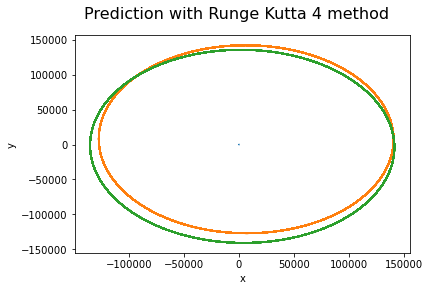

In [12]:
showSimulation(history, '2d')